In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Explorando dados**

In [ ]:
netflix = pd.read_csv('drive/MyDrive/Colab Notebooks/netflix_titles.csv')
netflix.shape

(8807, 12)

In [ ]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
netflix = netflix.drop(columns=['director', 'cast', 'description'])
netflix.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in'],
      dtype='object')

In [ ]:
netflix = netflix.dropna(subset=['date_added', 'duration'])
netflix.isnull().sum()

show_id           0
type              0
title             0
country         830
date_added        0
release_year      0
rating            4
duration          0
listed_in         0
dtype: int64

In [ ]:
# Atributo que indica o ano em que o conteúdo foi adicionado

year_added = [str(year)[-4:] for year in netflix['date_added']]
netflix['year_added'] = [int(y) for y in year_added]

In [ ]:
np.unique(netflix.loc[:, ('year_added')])

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021])

In [ ]:
np.unique(netflix['type'])

array(['Movie', 'TV Show'], dtype=object)

# **Visualização dos dados**

Proporção entre Filmes e Séries no catálogo da Netflix

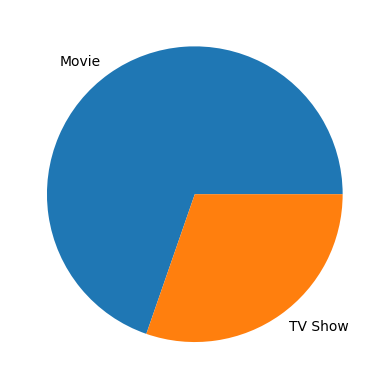

In [ ]:
plt.pie(netflix.loc[:, ('type')].value_counts(), labels=netflix.loc[:, ('type')].unique())
plt.show()

Proporção entre Filmes e Séries ao longo dos anos

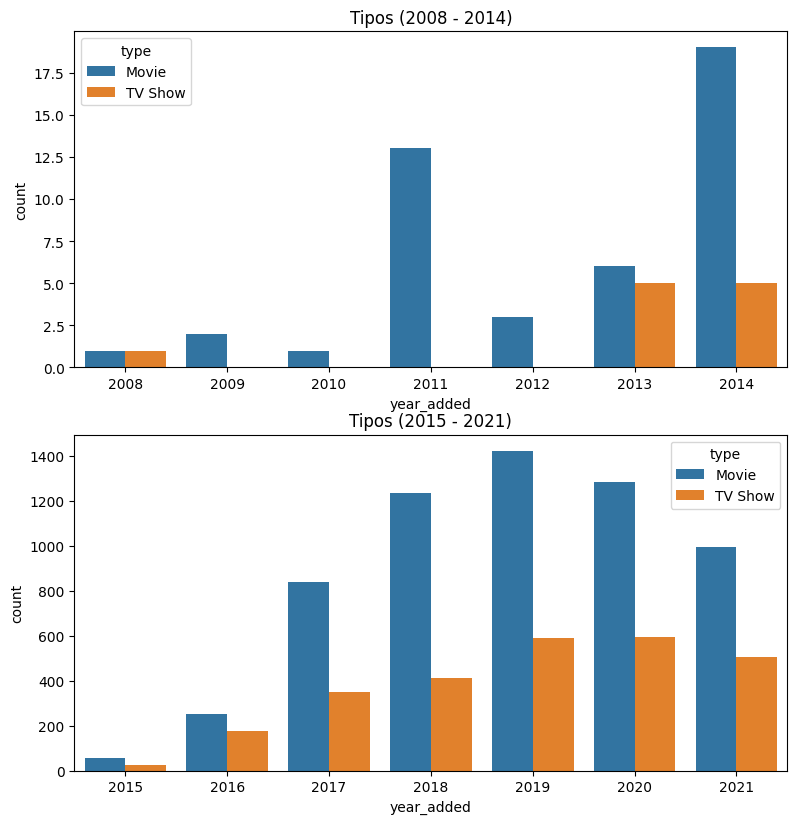

In [ ]:
plt.figure(figsize=[9.2, 9.6])
plt.subplot(2,1,1)
sns.countplot(data=netflix[netflix['year_added']<2015],
             x='year_added',
             hue='type',
             hue_order=['Movie', 'TV Show']).set_title('Tipos (2008 - 2014)')
plt.subplot(2,1,2)
sns.countplot(data=netflix[netflix['year_added']>=2015],
             x='year_added',
             hue='type',
             hue_order=['Movie', 'TV Show']).set_title('Tipos (2015 - 2021)')
plt.show()

Proporção ao longo dos anos entre Filmes e Séries adicionados no mesmo ano de lançamento (conteúdo fresco)

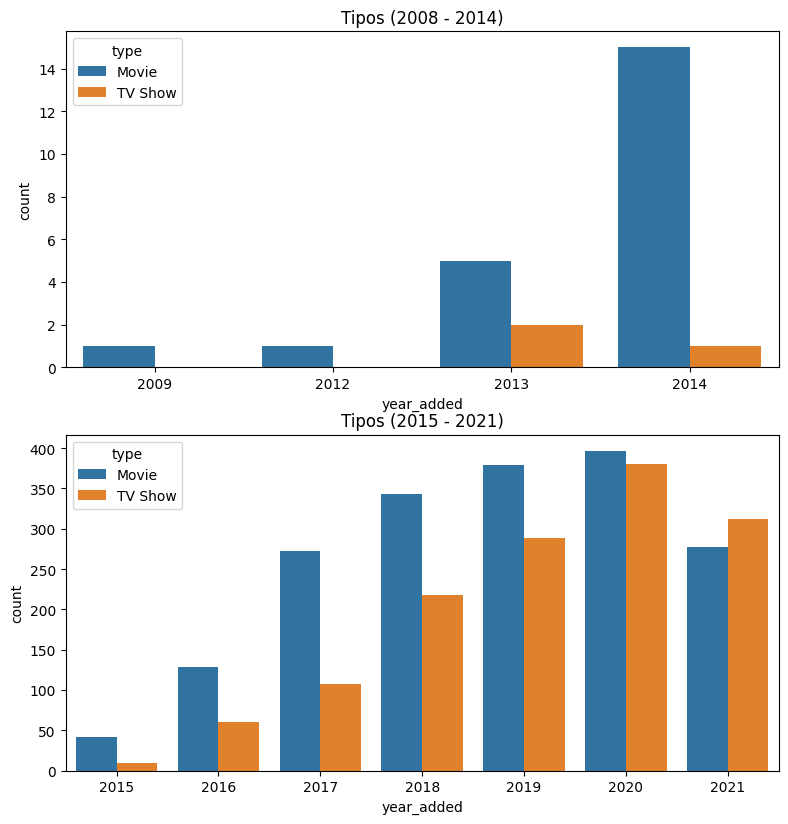

In [ ]:
plt.figure(figsize=[9.2, 9.6])
plt.subplot(2,1,1)
sns.countplot(data=netflix[(netflix['year_added']<2015) & (netflix['year_added']==netflix['release_year'])],
             x='year_added',
             hue='type',
             hue_order=['Movie', 'TV Show']).set_title('Tipos (2008 - 2014)')
plt.subplot(2,1,2)
sns.countplot(data=netflix[(netflix['year_added']>=2015) & (netflix['year_added']==netflix['release_year'])],
             x='year_added',
             hue='type',
             hue_order=['Movie', 'TV Show']).set_title('Tipos (2015 - 2021)')
plt.show()

Proporção ao longo dos anos entre Filmes e Séries adicionados em época diferente do lançamento (conteúdo antigo)

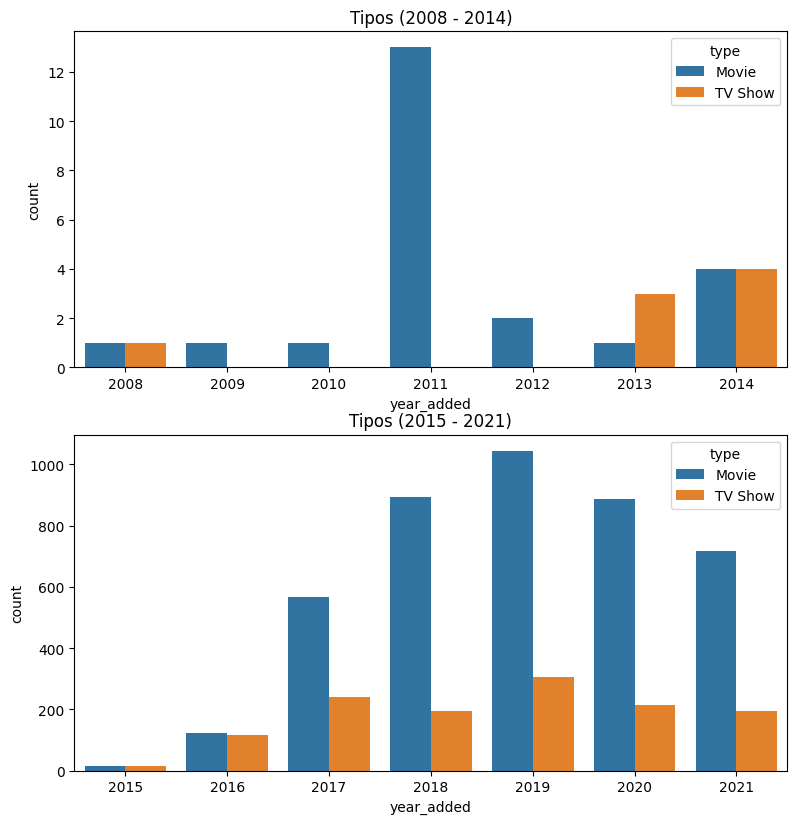

In [ ]:
plt.figure(figsize=[9.2, 9.6])
plt.subplot(2,1,1)
sns.countplot(data=netflix[(netflix['year_added']<2015) & (netflix['year_added']!=netflix['release_year'])],
             x='year_added',
             hue='type',
             hue_order=['Movie', 'TV Show']).set_title('Tipos (2008 - 2014)')
plt.subplot(2,1,2)
sns.countplot(data=netflix[(netflix['year_added']>=2015) & (netflix['year_added']!=netflix['release_year'])],
             x='year_added',
             hue='type',
             hue_order=['Movie', 'TV Show']).set_title('Tipos (2015 - 2021)')
plt.show()

Investigando categorias

In [ ]:
categories = []
for show_categ_list in netflix.loc[:, ('listed_in')].values:
  try:
    categories += show_categ_list.split(', ')
  except:
    categories.append(show_categ_list)


In [ ]:
categories = sorted(categories, key=categories.count)

In [ ]:
categories_u = np.unique(categories)
len(categories_u)

42

In [ ]:
contagem = {}
for cat in categories_u:
  contagem[cat] = 0


In [ ]:
for show_categ_list in netflix.loc[:, ('listed_in')].values:
  try:
    contagem[show_categ_list] += 1
  except:
    categories_list = show_categ_list.split(', ')
    for cat in categories_list:
      contagem[cat] += 1
  
contagem

{'Action & Adventure': 859,
 'Anime Features': 71,
 'Anime Series': 175,
 'British TV Shows': 252,
 'Children & Family Movies': 641,
 'Classic & Cult TV': 26,
 'Classic Movies': 116,
 'Comedies': 1674,
 'Crime TV Shows': 469,
 'Cult Movies': 71,
 'Documentaries': 869,
 'Docuseries': 394,
 'Dramas': 2427,
 'Faith & Spirituality': 65,
 'Horror Movies': 357,
 'Independent Movies': 756,
 'International Movies': 2752,
 'International TV Shows': 1350,
 "Kids' TV": 449,
 'Korean TV Shows': 151,
 'LGBTQ Movies': 102,
 'Movies': 54,
 'Music & Musicals': 375,
 'Reality TV': 255,
 'Romantic Movies': 616,
 'Romantic TV Shows': 370,
 'Sci-Fi & Fantasy': 243,
 'Science & Nature TV': 92,
 'Spanish-Language TV Shows': 173,
 'Sports Movies': 219,
 'Stand-Up Comedy': 343,
 'Stand-Up Comedy & Talk Shows': 56,
 'TV Action & Adventure': 167,
 'TV Comedies': 574,
 'TV Dramas': 762,
 'TV Horror': 75,
 'TV Mysteries': 98,
 'TV Sci-Fi & Fantasy': 83,
 'TV Shows': 16,
 'TV Thrillers': 57,
 'Teen TV Shows': 69,


In [ ]:
contagem = sorted(contagem.items(), key=lambda x: x[1], reverse=True)
contagem[:10]

[('International Movies', 2752),
 ('Dramas', 2427),
 ('Comedies', 1674),
 ('International TV Shows', 1350),
 ('Documentaries', 869),
 ('Action & Adventure', 859),
 ('TV Dramas', 762),
 ('Independent Movies', 756),
 ('Children & Family Movies', 641),
 ('Romantic Movies', 616)]

As 10 categorias mais presentes no catálogo

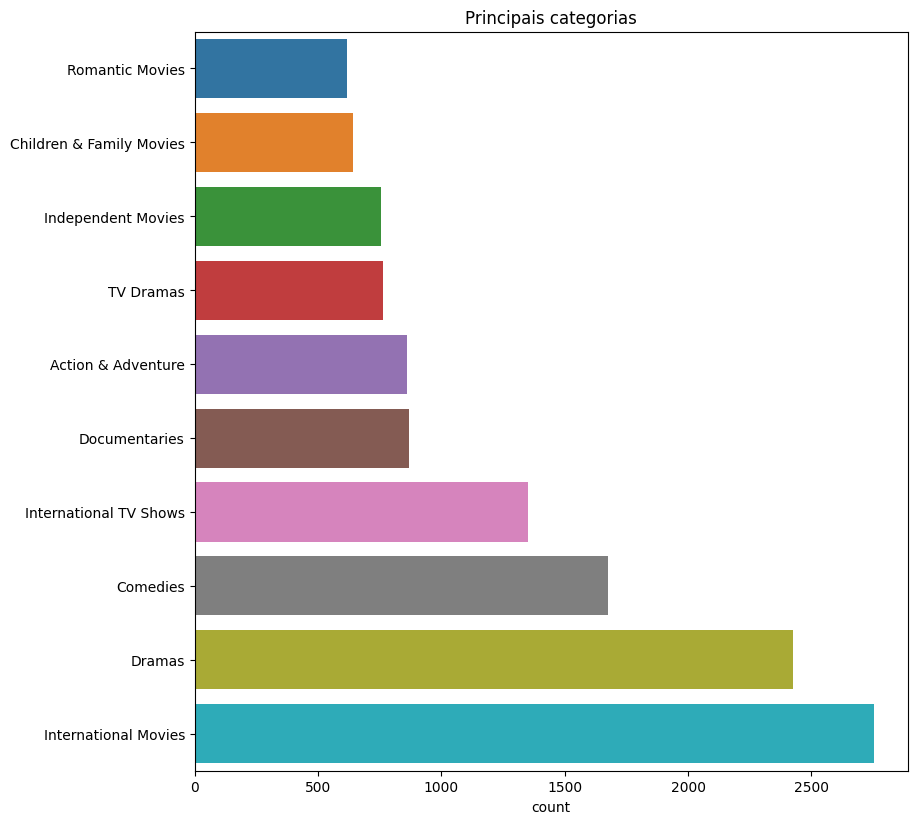

In [ ]:
plt.figure(figsize=[9.2, 9.6])
sns.countplot(y=[k for k in categories if k in [c[0] for c in contagem[:10]]]).set_title('Principais categorias')
plt.show()

In [ ]:
def verificaCategoria(df):
  categories = []
  for show_categ_list in df.loc[:, ('listed_in')].values:
    try:
      categories += show_categ_list.split(', ')
    except:
      categories.append(show_categ_list)

  categories = sorted(categories, key=categories.count)
  
  categories_u = np.unique(categories)

  contagem = {}
  for cat in categories_u:
    contagem[cat] = 0
  
  for show_categ_list in df.loc[:, ('listed_in')].values:
    try:
      contagem[show_categ_list] += 1
    except:
      categories_list = show_categ_list.split(', ')
      for cat in categories_list:
        contagem[cat] += 1
    
  contagem = sorted(contagem.items(), key=lambda x: x[1], reverse=True)

  return categories, [c[0] for c in contagem[:10]]

In [ ]:
cats, top10 = verificaCategoria(netflix[netflix['year_added']>=2019])
cats_old, top10_old = verificaCategoria(netflix[netflix['year_added']<2019])

Top 10 categorias no cenário antigo e mais recente

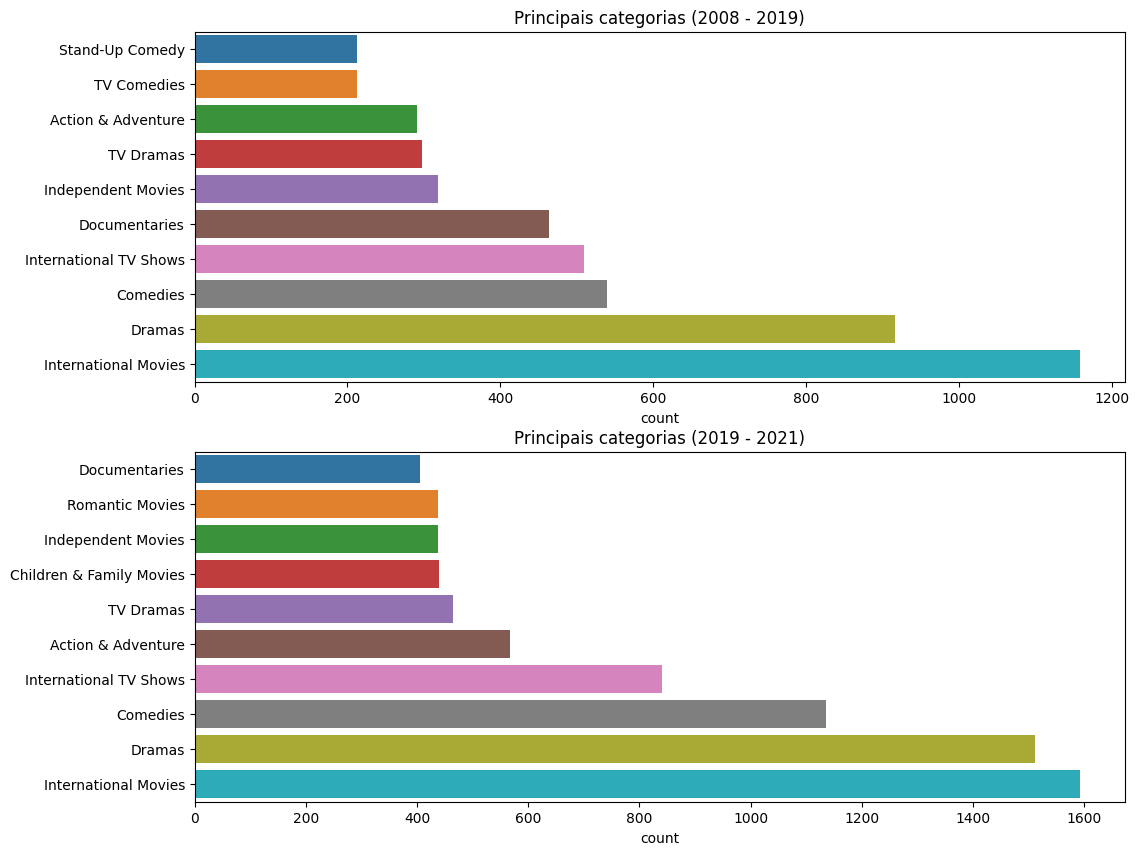

In [ ]:
plt.figure(figsize=[12, 10])
plt.subplot(2,1,1)
sns.countplot(y=[c for c in cats_old if c in top10_old]).set_title('Principais categorias (2008 - 2019)')
plt.subplot(2,1,2)
sns.countplot(y=[c for c in cats if c in top10]).set_title('Principais categorias (2019 - 2021)')
plt.show()

In [ ]:
cats_series, top10_series = verificaCategoria(netflix[(netflix['year_added']>=2019) & (netflix['type']=='TV Show')])
cats_series_old, top10_series_old = verificaCategoria(netflix[(netflix['year_added']<2019) & (netflix['type']=='TV Show')])
cats_movies, top10_movies = verificaCategoria(netflix[(netflix['year_added']>=2019) & (netflix['type']=='Movie')])
cats_movies_old, top10_movies_old = verificaCategoria(netflix[(netflix['year_added']<2019) & (netflix['type']=='Movie')])

Cenários antigo e recentes das categorias por tipo de conteúdo (TV Show ou Filme)

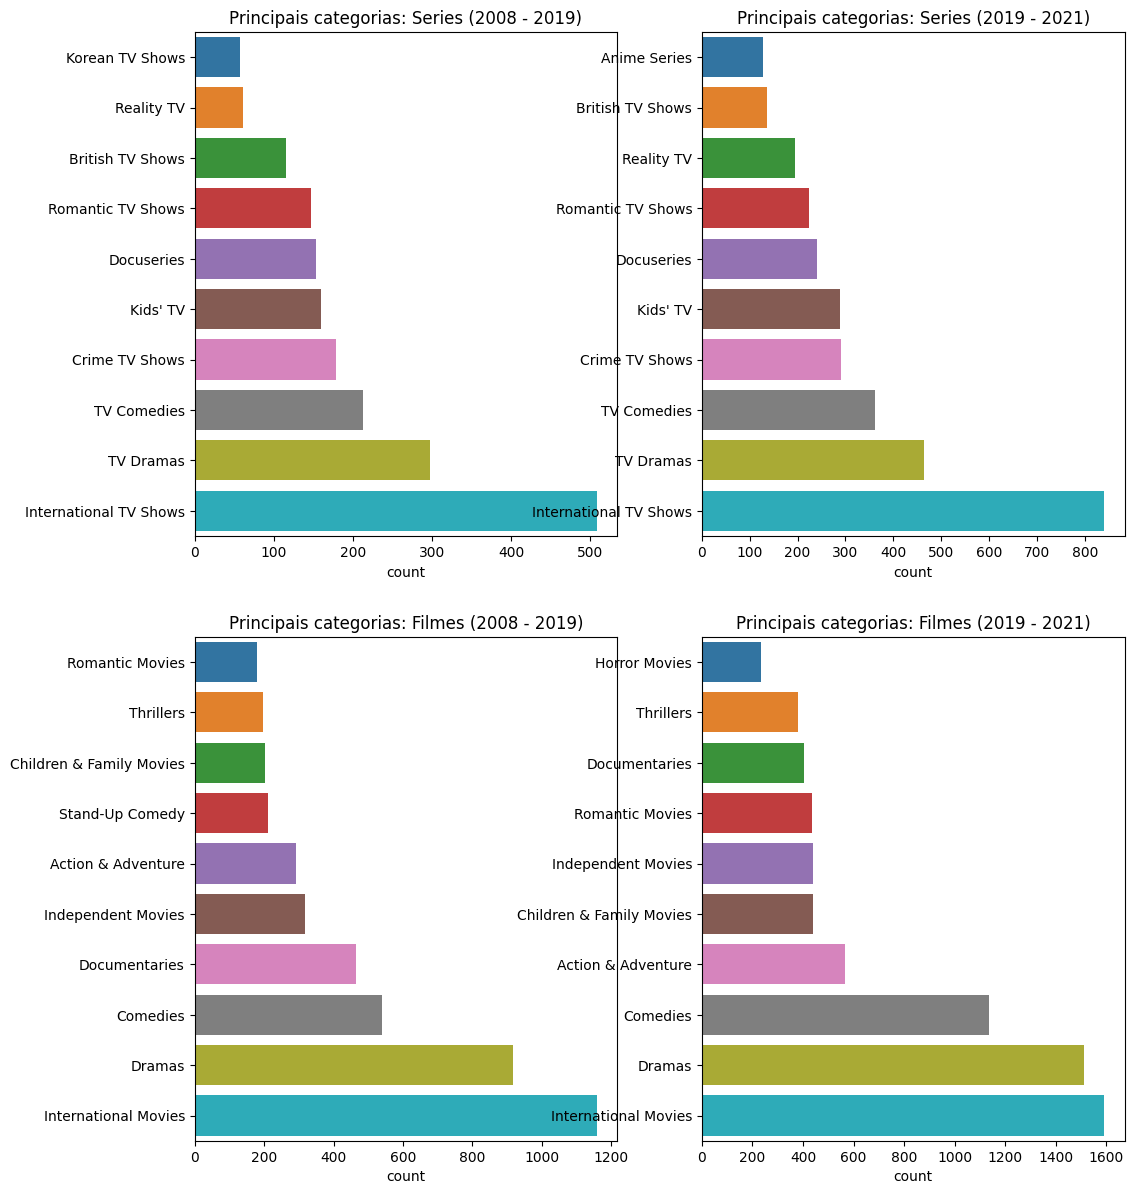

In [ ]:
plt.figure(figsize=[12, 14.4])
plt.subplot(2,2,1)
sns.countplot(y=[c for c in cats_series_old if c in top10_series_old]).set_title('Principais categorias: Series (2008 - 2019)')
plt.subplot(2,2,2)
sns.countplot(y=[c for c in cats_series if c in top10_series]).set_title('Principais categorias: Series (2019 - 2021)')
plt.subplot(2,2,3)
sns.countplot(y=[c for c in cats_movies_old if c in top10_movies_old]).set_title('Principais categorias: Filmes (2008 - 2019)')
plt.subplot(2,2,4)
sns.countplot(y=[c for c in cats_movies if c in top10_movies]).set_title('Principais categorias: Filmes (2019 - 2021)')
plt.show()

In [ ]:
old_count_tvshow = [netflix[
                      (netflix['type']=='TV Show')
                      & (netflix['year_added']!=netflix['release_year'])
                      & (netflix['year_added']==year)].shape[0] for year in np.sort(netflix['year_added'].unique())]

news_count_tvshow = [netflix[
                      (netflix['type']=='TV Show')
                      & (netflix['year_added']==netflix['release_year'])
                      & (netflix['year_added']==year)].shape[0] for year in np.sort(netflix['year_added'].unique())]

old_count_movie = [netflix[
                      (netflix['type']=='Movie')
                      & (netflix['year_added']!=netflix['release_year'])
                      & (netflix['year_added']==year)].shape[0] for year in np.sort(netflix['year_added'].unique())]

news_count_movie = [netflix[
                      (netflix['type']=='Movie')
                      & (netflix['year_added']==netflix['release_year'])
                      & (netflix['year_added']==year)].shape[0] for year in np.sort(netflix['year_added'].unique())]

In [ ]:
comp_tvshow = netflix[netflix['type']=='TV Show']['year_added'] == netflix[netflix['type']=='TV Show']['release_year']
comp_movie = netflix[netflix['type']=='Movie']['year_added'] == netflix[netflix['type']=='Movie']['release_year']

Tipo de filmes e séries (antigo x novidade) adicionados no catálogo ao longo dos anos

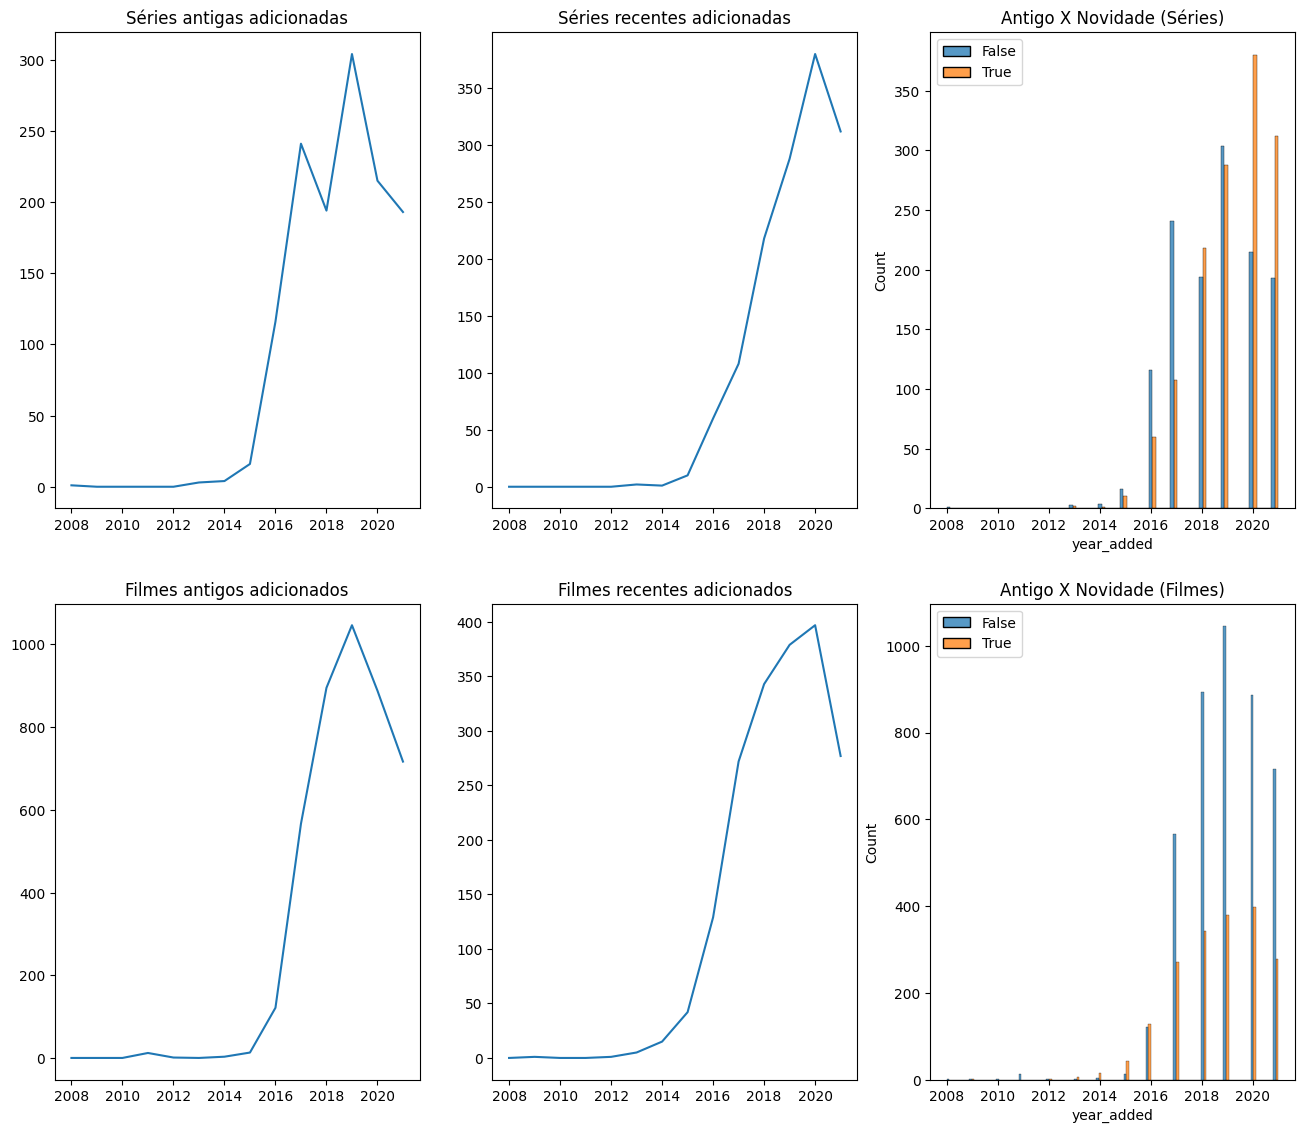

In [ ]:
plt.figure(figsize=[16, 13.6])
plt.subplot(2,3,1)
sns.lineplot(x=np.sort(netflix['year_added'].unique()),
             y=old_count_tvshow).set_title('Séries antigas adicionadas')
plt.subplot(2,3,2)
sns.lineplot(x=np.sort(netflix['year_added'].unique()),
             y=news_count_tvshow).set_title('Séries recentes adicionadas')
plt.subplot(2,3,3)
sns.histplot(data=netflix[netflix['type']=='TV Show'], x='year_added', hue=comp_tvshow.values, multiple='dodge').set_title('Antigo X Novidade (Séries)')
plt.subplot(2,3,4)
sns.lineplot(x=np.sort(netflix['year_added'].unique()),
             y=old_count_movie).set_title('Filmes antigos adicionados')
plt.subplot(2,3,5)
sns.lineplot(x=np.sort(netflix['year_added'].unique()),
             y=news_count_movie).set_title('Filmes recentes adicionados')
plt.subplot(2,3,6)
sns.histplot(data=netflix[netflix['type']=='Movie'], x='year_added', hue=comp_movie.values, multiple='dodge').set_title('Antigo X Novidade (Filmes)')
plt.show()